In [1]:
import pandas as pd
import xarray as xr
import pop_tools

In [2]:
# load data
df = pd.read_csv('1_std_events_dens_spg.csv')
grouped = df.groupby('Index')
path = '/home/innag3580/phase1_CONDA/'

# set periods
before = 40*12
after = 20*12

# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# set up regional mask
grid_name = 'POP_gx1v7'
region_defs = {
    'North Atlantic and Nordic Seas': [{'match': {'REGION_MASK': [6, 7, 9]}, 
                             'bounds': {'TLAT': [20., 78.]}}],
    'LabradorSea': [{'match': {'REGION_MASK': [8]}, 'bounds': {'TLAT': [45.0, 66.0]}}]
} 
mask3d = pop_tools.region_mask_3d(grid_name, region_defs=region_defs, mask_name='North Atlantic and Nordic Seas')
mask3d = mask3d.sum('region')

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [3]:
var_path = ['temp/temp_', 'salt/salt_', 'vvel/vvel_']
save_name = ['1_std_temp_composite.nc','1_std_salt_composite.nc','1_std_vvel_composite.nc']

In [4]:
# Count the occurrences of each value in the 'Condition' column
condition_counts = df['Condition'].value_counts()

# Print the counts
print(condition_counts)

Above    237
Below     60
Name: Condition, dtype: int64


In [7]:
37*12

444

In [6]:
12*5

60

In [3]:
df

,Index,Values,Condition
0,0,40,Above
1,0,50,Above
2,0,60,Above
3,0,80,Below
4,0,90,Below
...,...,...,...
292,80,60,Above
293,80,93,Below
294,80,113,Above
295,80,123,Above


In [6]:

iteration_count = 0

for i in range(len(var_path)):
    
    print('started: 'var_path[i][4:])
    
    datasets_below = []
    datasets_above = []
    for index, group_data in grouped:
        for event, condition in zip(group_data['Values'], group_data['Condition']):
            member = find_corresponding_file_name(index)[5:]
            event_time = event * 12
            period_start = event_time - before
            period_end = event_time + after
            time_slice = slice(period_start, period_end)
            file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'+var_path[i]+member
            try:
                ds = xr.open_dataset(file).isel(time=time_slice).resample(time='A').mean(dim='time').where(mask3d == 1).roll(nlon=-100)
            except ValueError as e:
                continue
            if condition == "Above":
                datasets_above.append(ds)
            elif condition == "Below":
                datasets_below.append(ds)

            iteration_count += 1
            print('event: ', iteration_count)
    print('events all processed')
    print('')

    for datasets, condition in zip((datasets_above, datasets_below), ("above", "below")):
        var_years = []
        for t in range(60):
            var_year = []
            for j in range(len(datasets)):
                ds = datasets[i]
                ds_file = ds.isel(time=t)
                var_year.append(ds_file)
            ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
            var_years.append(ds_comp)
            print('var_years: ', t, ' complete')
        composite_dataset = xr.concat(var_years, dim='time')
        composite_dataset.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/' + save_name[i].replace(".nc", f"_{condition}.nc"))
        print(condition, ' saved')
    print('ended: 'var_path[i][4:])
print('computation complete')


iteration count:  1
iteration count:  2
iteration count:  3
iteration count:  4
iteration count:  5
iteration count:  6
iteration count:  7
iteration count:  8
iteration count:  9
iteration count:  10
iteration count:  11
iteration count:  12
iteration count:  13
iteration count:  14
iteration count:  15
break
var_years:  0  complete
var_years:  1  complete
var_years:  2  complete
var_years:  3  complete
var_years:  4  complete
var_years:  5  complete
var_years:  6  complete
var_years:  7  complete
var_years:  8  complete
var_years:  9  complete
var_years:  10  complete
var_years:  11  complete
var_years:  12  complete
var_years:  13  complete
var_years:  14  complete
var_years:  15  complete
var_years:  16  complete
var_years:  17  complete
var_years:  18  complete
var_years:  19  complete
var_years:  20  complete
var_years:  21  complete
var_years:  22  complete
var_years:  23  complete
var_years:  24  complete
var_years:  25  complete
var_years:  26  complete
var_years:  27  complet

IndexError: list index out of range

In [9]:
for datasets, condition in zip((datasets_above, datasets_below), ("above", "below")):
        var_years = []
        for t in range(60):
            var_year = []
            for j in range(len(datasets)):
                ds = datasets[i]
                ds_file = ds.isel(time=t)
                var_year.append(ds_file)
            ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
            var_years.append(ds_comp)
            print('var_years: ', t, ' complete')
        composite_dataset = xr.concat(var_years, dim='time')
        #composite_dataset.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/' + save_name[i].replace(".nc", f"_{condition}.nc"))
        composite_dataset.to_netcdf(save_name[0].replace(".nc", f"_{condition}.nc"))
        print(condition, ' saved')

var_years:  0  complete
var_years:  1  complete
var_years:  2  complete
var_years:  3  complete
var_years:  4  complete
var_years:  5  complete
var_years:  6  complete
var_years:  7  complete
var_years:  8  complete
var_years:  9  complete
var_years:  10  complete
var_years:  11  complete
var_years:  12  complete
var_years:  13  complete
var_years:  14  complete
var_years:  15  complete
var_years:  16  complete
var_years:  17  complete
var_years:  18  complete
var_years:  19  complete
var_years:  20  complete
var_years:  21  complete
var_years:  22  complete
var_years:  23  complete
var_years:  24  complete
var_years:  25  complete
var_years:  26  complete
var_years:  27  complete
var_years:  28  complete
var_years:  29  complete
var_years:  30  complete
var_years:  31  complete
var_years:  32  complete
var_years:  33  complete
var_years:  34  complete
var_years:  35  complete
var_years:  36  complete
var_years:  37  complete
var_years:  38  complete
var_years:  39  complete
var_years:

In [ ]:
time_series = ds_var_annual.TEMP.isel(z_t=0).mean(('nlon','nlat')).values

In [5]:
# List to hold individual datasets
datasets = []

# for test
iteration_count = 0

# Iterate over variables
for i in range(len(var_path)):
    # Iterate over each group (index)
    for index, group_data in grouped:
        # Iterate over each event (or value) in the group
        for event in group_data['Values']:
            # Define entire time range for the event
            member = find_corresponding_file_name(index)[5:]
            event_time = event * 12
            period_start = event_time - before
            period_end = event_time + after

            # Select time range in data arrays
            time_slice = slice(period_start, period_end)

            file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'+var_path[i]+member
            try:
                ds = xr.open_dataset(file).isel(time=time_slice).resample(time='A').mean(dim='time').where(mask3d == 1).roll(nlon=-100)
            except ValueError as e:
                continue
            
            datasets.append(ds)
            
     # test       
            iteration_count += 1
            if iteration_count == 3:
                break
        if iteration_count == 3:
            break
            
    # Combine all datasets into a single dataset lazily
    #composite_dataset = xr.combine_nested(datasets, concat_dim='event')
    
    var_years = []
    for t in range(60):
        var_year = []
        for i in range(len(datasets)):

            ds = datasets[i]
            ds_file = ds.isel(time=t)
            var_year.append(ds_file)

        ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
        var_years.append(ds_comp)

    ds_var_annual = xr.concat(var_years, dim='time')
    
    break

    # Save the final dataset to a NetCDF file
    composite_dataset.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/'+save_name)

KeyError: 'aice'

In [14]:
len(datasets)

5

In [8]:
ds_var_annual

<xarray.Dataset>
Dimensions:                 (time: 60, z_t: 60, nlat: 384, nlon: 320, z_w: 60,
                             z_t_150m: 15, z_w_top: 60, z_w_bot: 60,
                             lat_aux_grid: 395, moc_z: 61)
Coordinates:
  * z_t                     (z_t) float32 500.0 1.5e+03 ... 5.125e+05 5.375e+05
  * z_t_150m                (z_t_150m) float32 500.0 1.5e+03 ... 1.45e+04
  * z_w                     (z_w) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_top                 (z_w_top) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05
  * z_w_bot                 (z_w_bot) float32 1e+03 2e+03 ... 5.25e+05 5.5e+05
  * lat_aux_grid            (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
  * moc_z                   (moc_z) float32 0.0 1e+03 2e+03 ... 5.25e+05 5.5e+05
    ULONG                   (nlat, nlon) float64 321.1 322.3 ... 319.6 320.0
    ULAT                    (nlat, nlon) float64 -78.95 -78.95 ... 72.41 72.41
    TLONG                   (nlat, nlon) float64 320.6 321.7 ... 319.4 319.8
    TLAT                    (nlat, nlon) float64 -79.22 -79.22 ... 72.19 72.19
Dimensions without coordinates: time, nlat, nlon
Data variables: (12/51)
    dz                      (time, z_t, nlat, nlon) float32 nan nan ... nan nan
    dzw                     (time, z_w, nlat, nlon) float32 nan nan ... nan nan
    KMT                     (time, nlat, nlon) float64 nan nan nan ... nan nan
    KMU                     (time, nlat, nlon) float64 nan nan nan ... nan nan
    REGION_MASK             (time, nlat, nlon) float64 nan nan nan ... nan nan
    UAREA                   (time, nlat, nlon) float64 nan nan nan ... nan nan
    ...                      ...
    fwflux_factor           (time, nlat, nlon) float64 nan nan nan ... nan nan
    salinity_factor         (time, nlat, nlon) float64 nan nan nan ... nan nan
    sflux_factor            (time, nlat, nlon) float64 nan nan nan ... nan nan
    nsurface_t              (time, nlat, nlon) float64 nan nan nan ... nan nan
    nsurface_u              (time, nlat, nlon) float64 nan nan nan ... nan nan
    TEMP                    (time, z_t, nlat, nlon) float32 nan nan ... nan nan

In [10]:
time_series = composite_dataset.TEMP.isel(z_t=0).mean(('nlon','nlat')).values

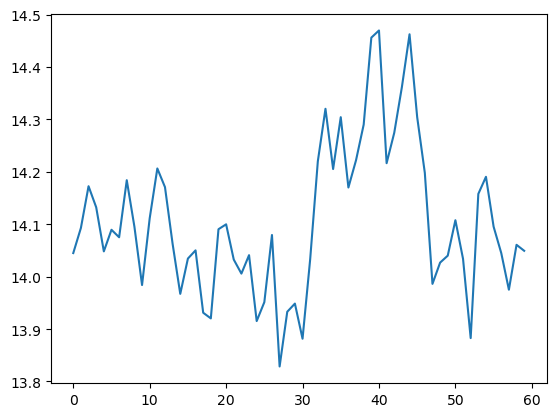

In [11]:
import matplotlib.pyplot as plt
plt.plot(time_series)

In [ ]:
for i in range(len(var_path)):
    datasets_below = []
    datasets_above = []
    for index, group_data in grouped:
        for event in group_data['Values']:
            member = find_corresponding_file_name(index)[5:]
            event_time = event * 12
            period_start = event_time - before
            period_end = event_time + after
            time_slice = slice(period_start, period_end)

            file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/'+var_path[i]+member
            try:
                ds = xr.open_dataset(file).isel(time=time_slice).resample(time='A').mean(dim='time').where(mask3d == 1).roll(nlon=-100)
            except ValueError as e:
                continue
            
            if condition == "Below":
                datasets_below.append(ds)
            elif condition == "Above":
                datasets_above.append(ds)
            
    # Combine all datasets into single datasets for below and above conditions
    composite_below = xr.combine_nested(datasets_below, concat_dim='event')
    composite_above = xr.combine_nested(datasets_above, concat_dim='event')
    
    # Process further as needed
    # ...


In [17]:
# Iterate over each group (index)
for index, group_data in grouped:
    # Iterate over each event (or value) in the group
    for event in group_data['Values']:
        # Define entire time range for the event
        member = find_corresponding_file_name(index)[5:]
        event_time = event * 12
        period_start = event_time - before
        period_end = event_time + after

        # Select time range in data arrays
        time_slice = slice(period_start, period_end)
            
        temp_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/temp/temp_'+member
        ds = xr.open_dataset(temp_file).isel(time=time_slice).resample(time='A').mean(dim='time').where(mask3d == 1).roll(nlon=-100)

        # Save the dataset to a NetCDF file
        #ds.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/aice_composite_' + member + '_event_' + str(event))
        ds.to_netcdf('test.nc')
        
        print('Dataset for member ' + member + ' and event ' + str(event) + ' saved')


Dataset for member 1301.019.nc and event 115 saved


In [ ]:
## INITIALISATION
path = '/home/innag3580/phase1_CONDA/'

# Load data events and their temporal location
data = np.genfromtxt(path+'current/events_dens_spg.csv', delimiter=',', names=True, dtype=None)

# Accessing columns by name
member_numbers = data['Index']
events = data['Values']
member_names = np.zeros(len(member_numbers))

# set periods
before = 40*12
after = 20*12

# find file names 
def find_corresponding_file_name(vvel_number_to_find):
    with open(path+'timeseries/order.txt', 'r') as file:
        vvel_list = file.readlines()
    vvel_dict = {filename.split()[1]: int(filename.split()[0]) for filename in vvel_list}
    vvel_filename = None
    for filename in vvel_list:
        if vvel_dict[filename.split()[1]] == vvel_number_to_find:
            vvel_filename = filename.split()[1]  
            break
    return vvel_filename

# SELECT TIME RANGE

In [2]:
for i in range(0, len(member_numbers)):

    # define entire time range for event
    member = find_corresponding_file_name(member_numbers[i])[5:]
    event = events[i]*12
    period_start = event-before
    period_end = event+after
    
    print('computation member '+member+' started')

    # select time range in data arrays
    time = slice(period_start, period_end)

    # open files and take annual means 

    # march data
    aice_file = '/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/aice/aice_'+member
    #ds = xr.open_dataset(aice_file).isel(time=time)
    
    ds_aice = xr.open_dataset(aice_file).isel(time=time)
    ds_aice_march = ds_aice.isel(time=(ds_aice['time.month'] == 3))
    

    if 'time_bound' in ds_aice_march.variables:
        ds_aice_march = ds_aice_march.drop_vars('time_bound')

    # save array
    ds_aice_march.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/aice_composite_'+member)
    
    print(member+' saved')

computation member 1301.019.nc started
1301.019.nc saved
computation member 1231.001.nc started
1231.001.nc saved
computation member 1281.012.nc started
1281.012.nc saved
computation member 1301.001.nc started
1301.001.nc saved
computation member 1281.017.nc started
1281.017.nc saved
computation member 1231.020.nc started
1231.020.nc saved
computation member 1231.004.nc started
1231.004.nc saved
computation member 1281.010.nc started
1281.010.nc saved
computation member 1281.020.nc started
1281.020.nc saved
computation member 1301.015.nc started
1301.015.nc saved
computation member 1281.015.nc started
1281.015.nc saved
computation member 1231.003.nc started
1231.003.nc saved
computation member 1251.010.nc started
1251.010.nc saved


# COMPUTE 60 YEAR ANNUAL COMPOSITES

In [3]:
aice_files = sorted(glob.glob('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/aice_composite_*.nc'))

In [4]:
var_years = []
for t in range(60):
    var_year = []
    for i in range(len(aice_files)):
        try:
            ds = xr.open_dataset(aice_files[i])
        except ValueError as e:
            continue

        ds_file = ds['aice'].isel(time=t)
        var_year.append(ds_file)

    ds_comp = xr.concat(var_year, dim='file').mean(dim='file')
    var_years.append(ds_comp)

ds_var_annual = xr.concat(var_years, dim='time')

ds_var_annual.to_netcdf('/Data/gfi/share/ModData/CESM2_LENS2/ocean/monthly/comp/AICEcomposite.nc')

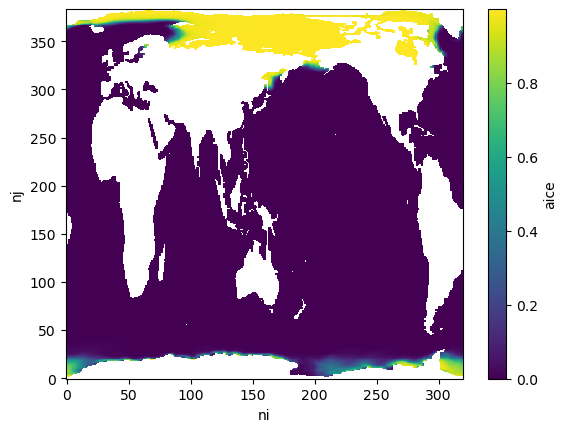

In [5]:
ds_var_annual.isel(time=0).plot()